In [1]:
#import numpy, pandas, matplotlib, seaborn, 
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline

In [2]:
#Load the dataset
df = pd.read_csv('Dataset.csv')

In [3]:
#Look at the dataset, its columns, range of those columns, 
df.shape


(8950, 18)

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
#Drop those columns wbich bave data in non-int or non-float form and whose data wouldn't be useful even if we convert it to a number
missing_value=np.nan
df.drop('CUST_ID',axis=1,inplace=True)

In [6]:
#Find missing values in data
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
#If a column has more than 70% missing vaues then drop it
#Otherwise fill it with mean (experiment with both mean and median)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
#Plot distribution plots of different columns
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


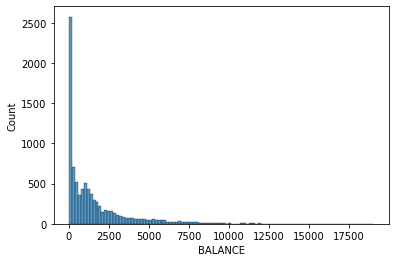

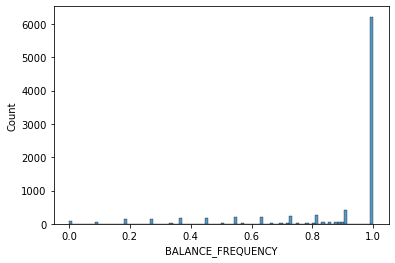

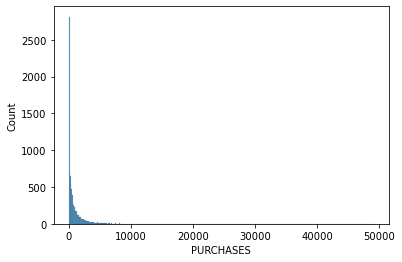

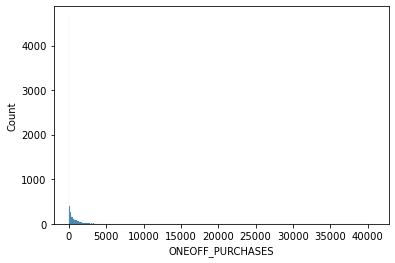

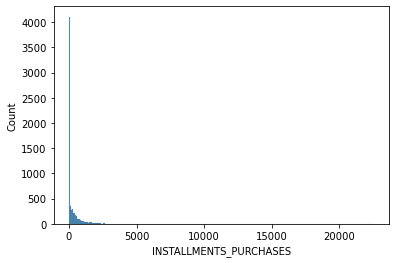

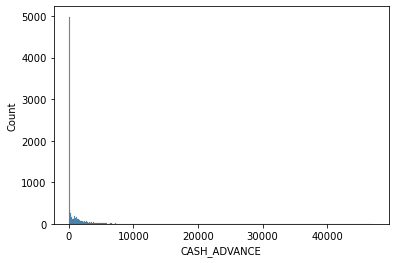

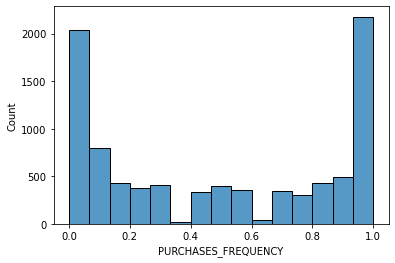

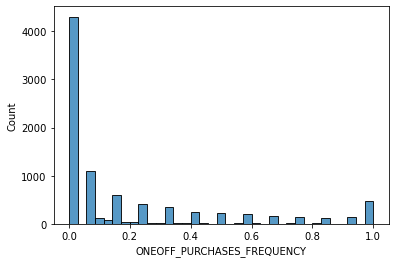

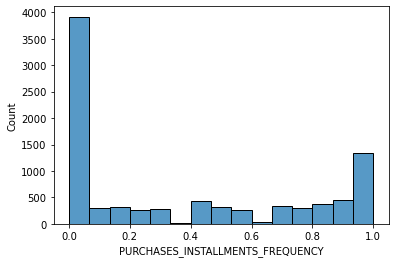

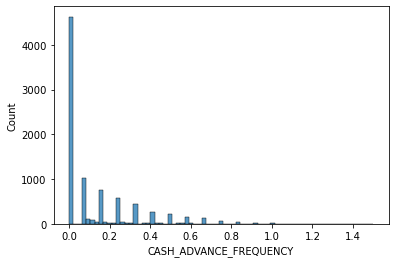

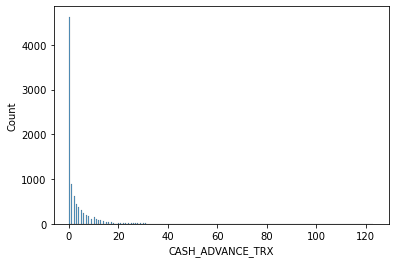

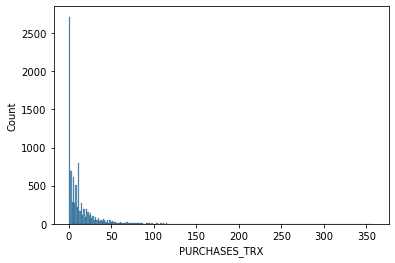

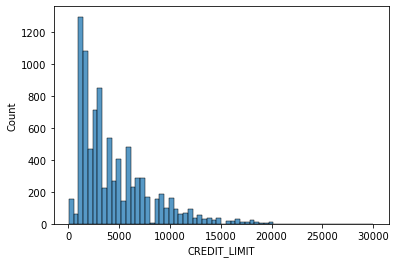

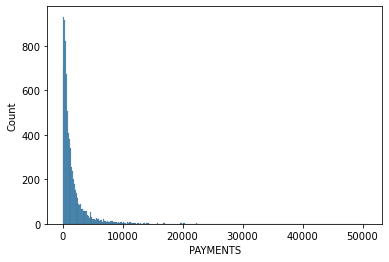

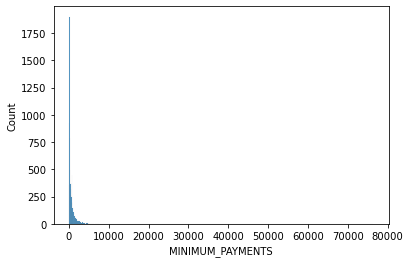

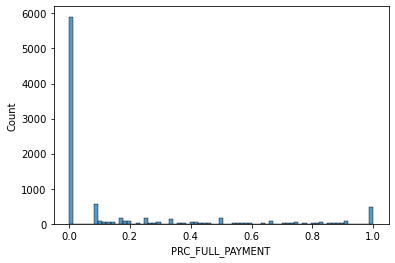

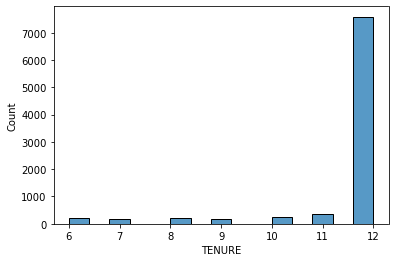

In [9]:
for col in df:
    plt.figure()
    sns.histplot(df[col])
    

In [10]:
#Find skewness in data of different columns
df.skew(axis=0)  

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [11]:
#Remove skewness using square root transform(try out different methods like log transform)
for col in df:
    df[col]=np.sqrt(df[col])
df.skew(axis=0)   
    

BALANCE                             0.829498
BALANCE_FREQUENCY                  -2.819495
PURCHASES                           1.730752
ONEOFF_PURCHASES                    2.129460
INSTALLMENTS_PURCHASES              1.546939
CASH_ADVANCE                        1.486159
PURCHASES_FREQUENCY                -0.421872
ONEOFF_PURCHASES_FREQUENCY          0.724607
PURCHASES_INSTALLMENTS_FREQUENCY    0.130409
CASH_ADVANCE_FREQUENCY              0.706976
CASH_ADVANCE_TRX                    1.417779
PURCHASES_TRX                       1.185757
CREDIT_LIMIT                        0.680933
PAYMENTS                            1.951535
MINIMUM_PAYMENTS                    3.805340
PRC_FULL_PAYMENT                    1.297280
TENURE                             -3.064332
dtype: float64

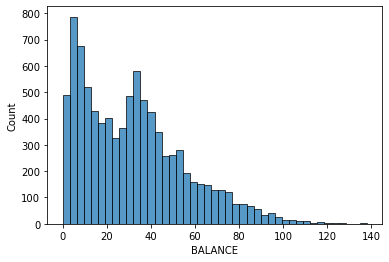

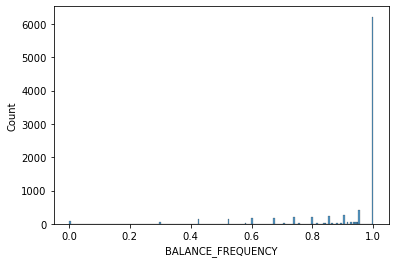

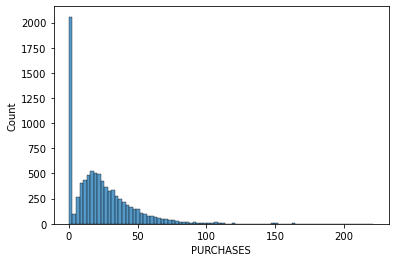

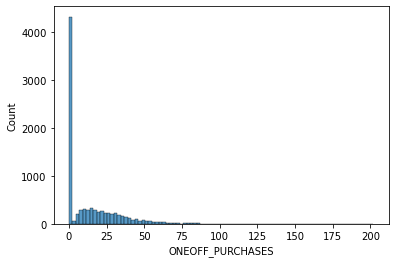

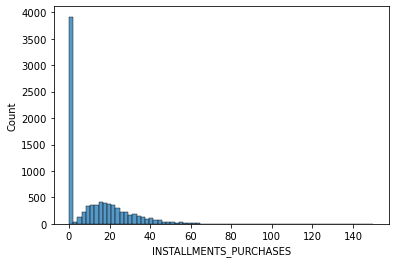

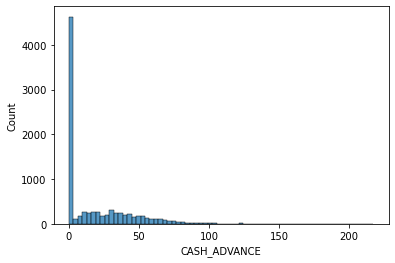

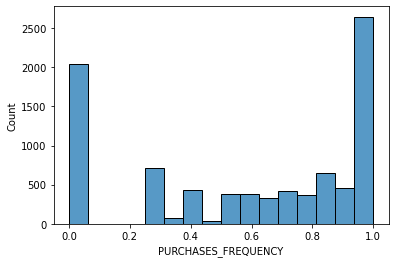

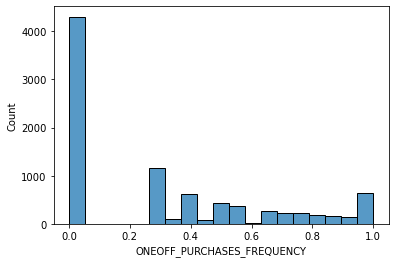

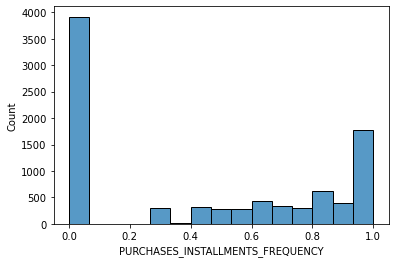

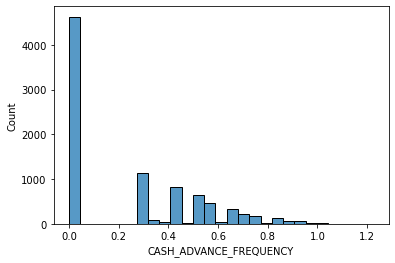

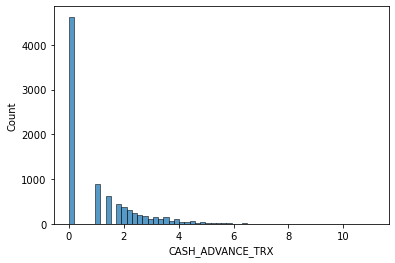

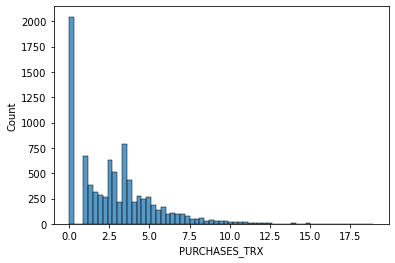

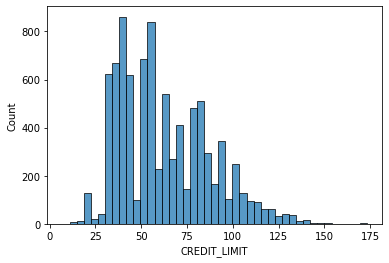

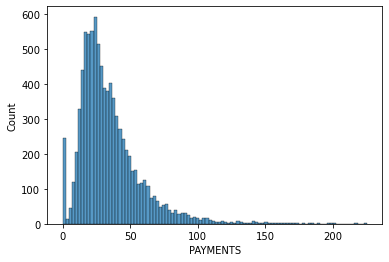

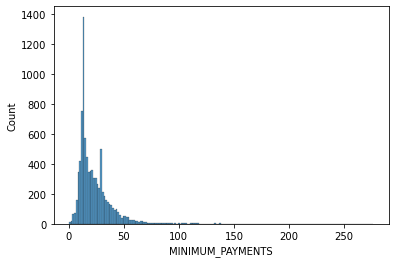

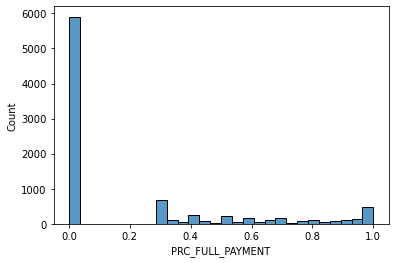

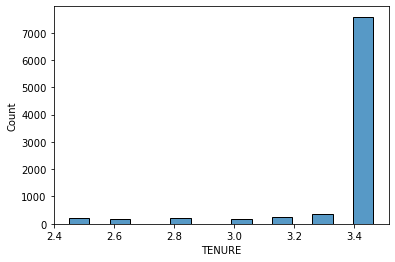

In [12]:
#Plot the data and find skewness again to check how much it was corrected
for col in df:
    plt.figure()
    sns.histplot(df[col])

Text(0.5, 1.0, 'Correlation between different features')

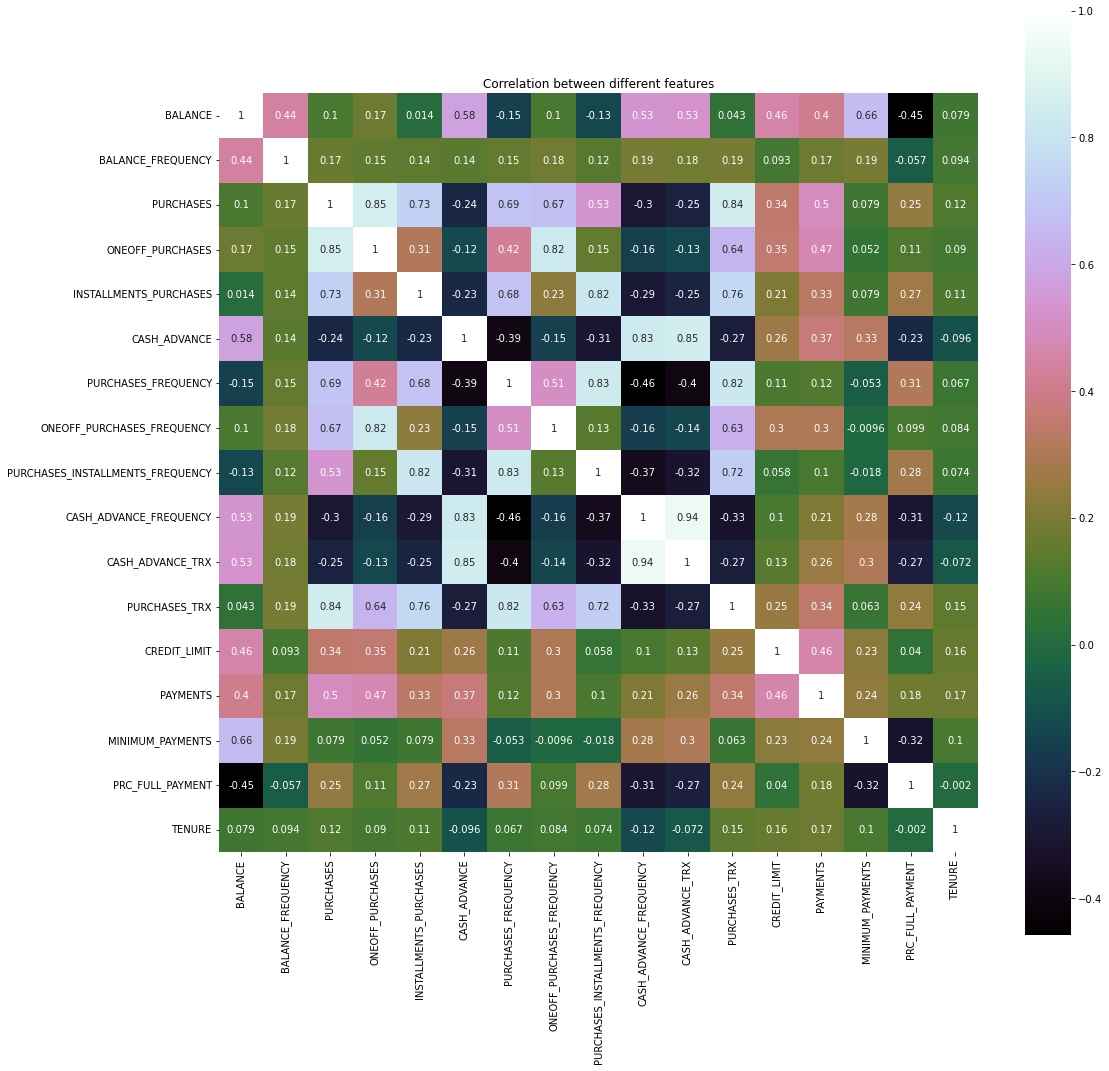

In [13]:
#Plot correlation heatmap to see if there are many correlated features
correlation = df.corr()
plt.figure(figsize=(17,17))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [14]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)

Text(0, 0.5, 'Cumulative explained variance')

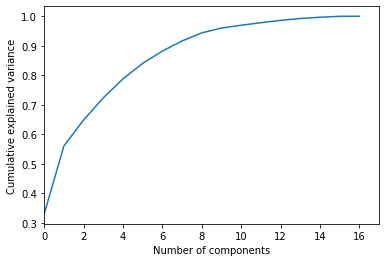

In [15]:
#Apply PCA and find out many principal components are needed to explain how much variance then take required  number of principal components so that you reduce the number of columns as well as retain a lot variance of original data as well
from sklearn.decomposition import PCA
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,17,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [16]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(df_std)
print(Y_sklearn)

[[-0.88512191 -2.48301693  0.23090242 ...  0.04336989 -0.38202562
  -0.35720617]
 [-3.00034342  2.01508943 -0.16533426 ...  1.67093843 -0.28801526
   0.94274938]
 [ 1.19172624  0.38517395 -1.92678896 ... -0.55010278 -0.23006842
   0.52287556]
 ...
 [ 0.10596162 -3.06675754  1.18931984 ... -2.96585047  1.26333337
   1.97973232]
 [-2.84716017 -2.51797947 -0.29519488 ... -2.99036079  0.69668999
   1.77427724]
 [-0.16460436 -0.5243077  -1.64424995 ... -4.69253162  1.53231934
   0.09281539]]


In [17]:
Y_sklearn.shape

(8950, 7)

In [18]:
df=pd.DataFrame(Y_sklearn,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.885122,-2.483017,0.230902,0.807129,0.043370,-0.382026,-0.357206
1,-3.000343,2.015089,-0.165334,-1.087171,1.670938,-0.288015,0.942749
2,1.191726,0.385174,-1.926789,1.859338,-0.550103,-0.230068,0.522876
3,-0.794805,0.218433,-1.661542,1.195618,0.058950,0.798510,-0.086756
4,-1.265058,-1.593317,-0.689436,1.339644,-0.114019,-0.837737,0.231600
...,...,...,...,...,...,...,...
8945,0.668484,-2.871696,1.452469,-2.236975,-2.854943,0.766981,2.343375
8946,0.262604,-2.240280,1.844972,-0.568118,-3.339266,1.706628,1.774529
8947,0.105962,-3.066758,1.189320,-1.775107,-2.965850,1.263333,1.979732
8948,-2.847160,-2.517979,-0.295195,-2.148352,-2.990361,0.696690,1.774277


In [19]:
from sklearn.cluster import KMeans
wcss = [] 
m = range(1,11)
for i in m: 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df) 
    wcss.append(kmeans.inertia_)

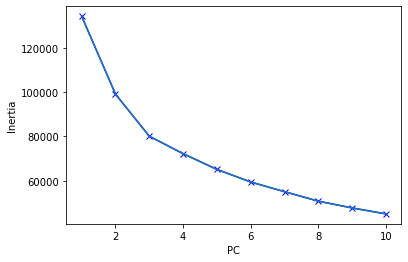

In [20]:
plt.plot(m,wcss,'bx-')
plt.plot(range(1, 11), wcss)
plt.xlabel('PC')
plt.ylabel('Inertia') 
plt.show()

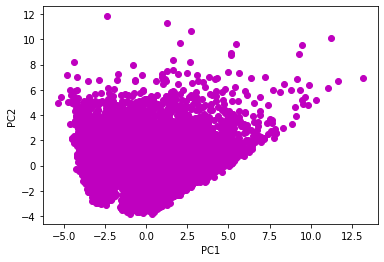

In [21]:
X = df[["PC1", "PC2","PC3","PC4","PC5","PC6","PC7"]]
plt.scatter(X["PC1"], X["PC2"], c="m")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

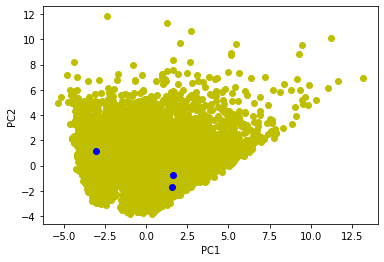

In [22]:
K=3

Centroids = (X.sample(n=K))
plt.scatter(X["PC1"], X["PC2"], c="y")
plt.scatter(Centroids["PC1"], Centroids["PC2"], c="blue")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [23]:
Centroids

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
2616,1.570560,-1.698821,0.807623,-1.119065,1.547901,0.001027,0.792119
2960,-3.063973,1.191018,-0.058463,0.476760,0.787565,-0.193401,0.651509
2478,1.659748,-0.712175,0.430911,1.010753,-0.027300,0.701144,-0.465089


In [24]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["PC1"]-row_d["PC1"])**2
            d2 = (row_c["PC2"]-row_d["PC2"])**2
            d3 = (row_c["PC3"]-row_d["PC3"])**2
            d4 = (row_c["PC4"]-row_d["PC4"])**2
            d5 = (row_c["PC5"]-row_d["PC5"])**2
            d6 = (row_c["PC6"]-row_d["PC6"])**2
            d7 = (row_c["PC7"]-row_d["PC7"])**2
            d = sqrt(d1+d2+d3+d4+d5+d6+d7)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["PC1", "PC2","PC3","PC4","PC5","PC6","PC7"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['PC1'] - Centroids['PC1']).sum() + (Centroids_new['PC2'] - Centroids['PC2']).sum() + (Centroids_new['PC3'] - Centroids['PC3']).sum() + (Centroids_new['PC4'] - Centroids['PC4']).sum() +(Centroids_new['PC5'] - Centroids['PC5']).sum()+ (Centroids_new['PC6'] - Centroids['PC6']).sum()+(Centroids_new['PC7'] - Centroids['PC7']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["PC1","PC2","PC3","PC4","PC5","PC6","PC7"]]

0.03820284577208599
0.14063370142968307
0.4261499072523626
0.47334994751559073
0.36653366716506036
0.2568573201204481
0.1790029915884378
0.0902143880354185
0.06156807536154927
0.04347830086466438
0.026710174796633516
0.02830723642114878
0.011374487639212113
0.009823033172494096
0.008538281253990934
0.00397269007330586
0.005191682741103817
0.005721408943584694
0.0


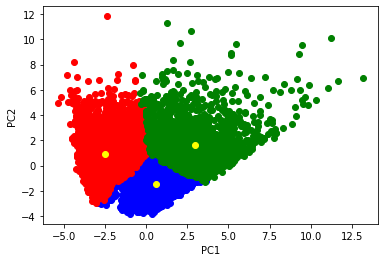

In [29]:
color=['blue','red','green']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["PC1"],data["PC2"],c=color[k])
plt.scatter(Centroids["PC1"],Centroids["PC2"],c='yellow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()